## Rotation

In [1]:
import os
import sys
sys.path.append(os.path.join('..'))
from pathlib import Path

import cv2
import numpy as np

from utils.imutils import jimshow, jimshow_channel

import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(os.path.join('..', 'data', 'img', 'davinci', 'Leonardo_da_Vinci_1.jpg'))
image.shape

(1417, 1024, 3)

In [3]:
#jimshow(image, 'Da Vinci Numero Uno')

## Center of image to rotate around

In [4]:
height, width = image.shape[:2]

center = (width // 2, height // 2)

In [5]:
center

(512, 708)

## Create rotation matrix

In [6]:
M = cv2.getRotationMatrix2D(center, 45, 0.8)

In [7]:
rotated = cv2.warpAffine(image, M, (width, height))

In [8]:
#jimshow(rotated, 'Rotated Vinci')

In [9]:
def imrotate(image, deg, scale = 1):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    M = cv2.getRotationMatrix2D(center, deg, scale)
    
    return cv2.warpAffine(image, M, (width, height))

## Splitting channels

In [10]:
blue, green, red = cv2.split(image)

In [11]:
#jimshow_channel(blue)

## Show img with just one color channel

In [12]:
# Empty 2d np-array with the size of img
empty_array = np.zeros((image.shape[:2]), dtype='uint8')

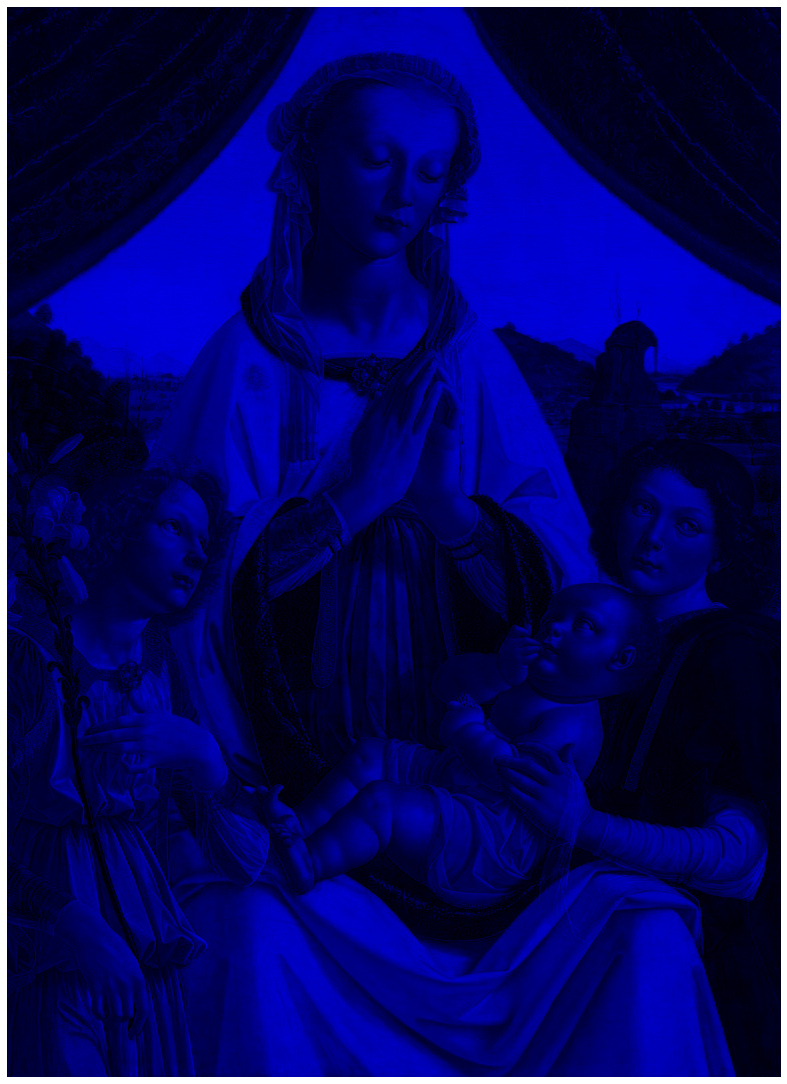

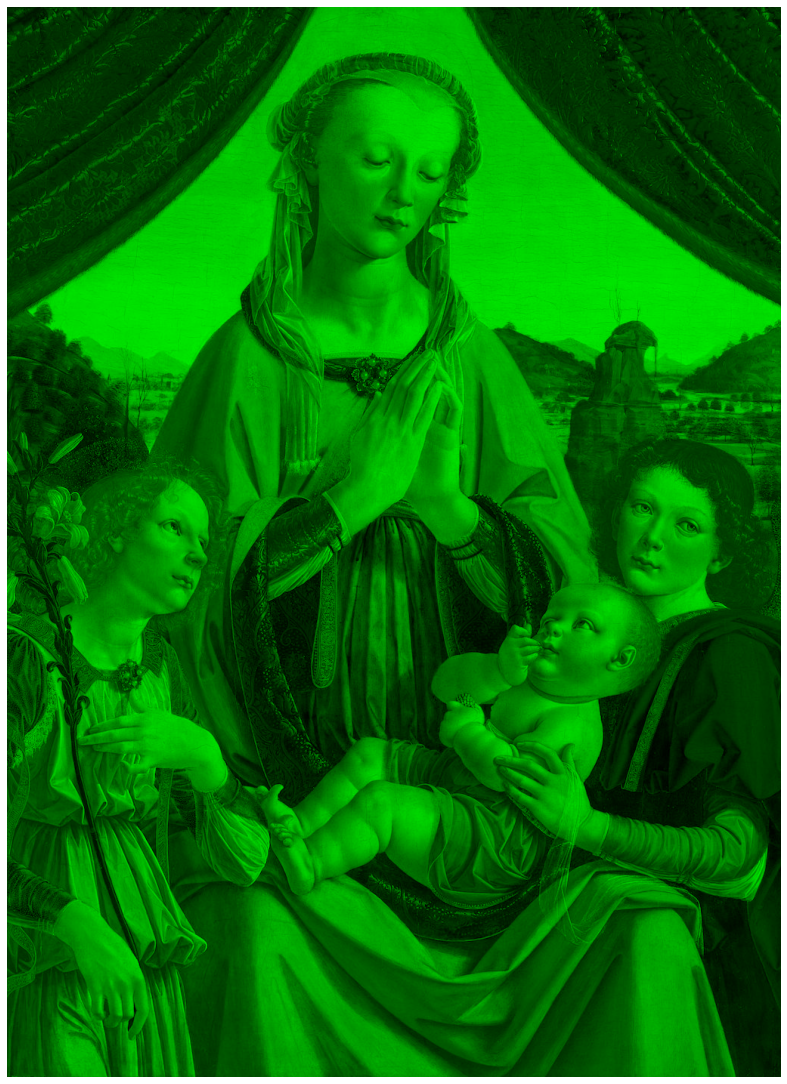

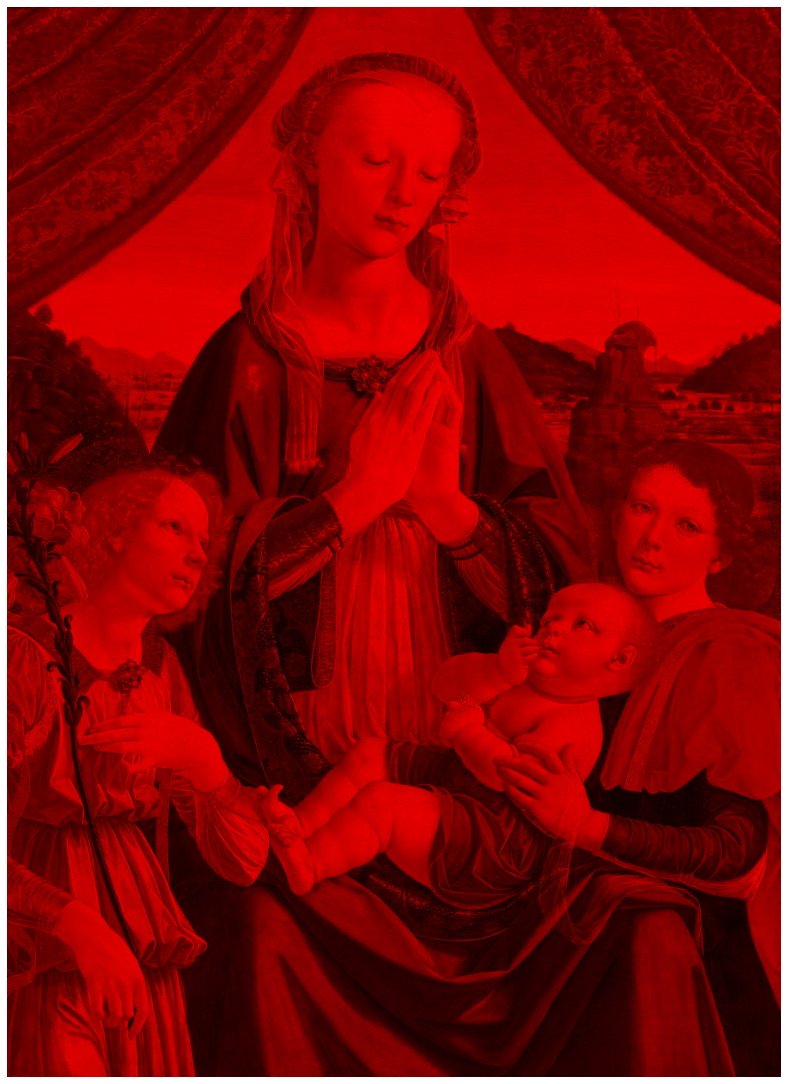

In [13]:
blue_img = cv2.merge([blue, empty_array, empty_array])
green_img = cv2.merge([empty_array, green, empty_array])
red_img = cv2.merge([empty_array, empty_array, red])
jimshow(blue_img)
jimshow(green_img)
jimshow(red_img)

## Histograms

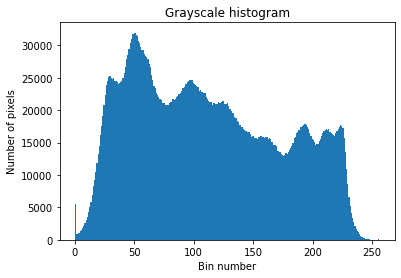

In [14]:
plt.figure()
plt.hist(image.flatten(), 256, [0,256]) # our array of interest, number og bins, range of possible values
plt.title('Grayscale histogram')
plt.xlabel('Bin number')
plt.ylabel('Number of pixels')
plt.show()

## Studying multiple images

In [15]:
def plot_grayscale(input_image, title):
    plt.figure()
    plt.hist(input_image.flatten(), 256, [0,256]) # our array of interest, number og bins, range of possible values
    plt.title(title)
    plt.xlabel('Bin number')
    plt.ylabel('Number of pixels')
    plt.show()

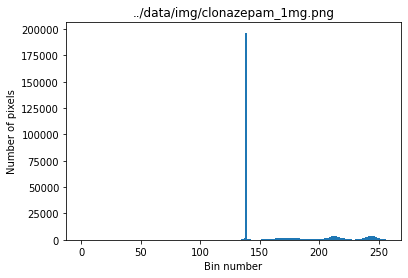

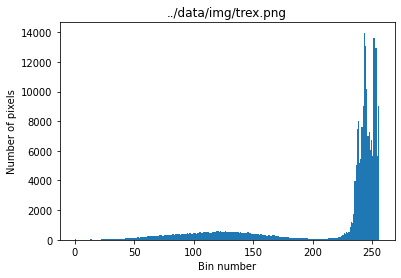

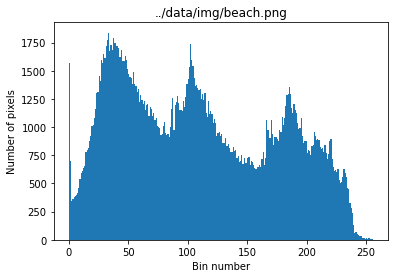

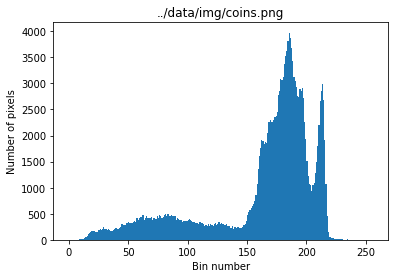

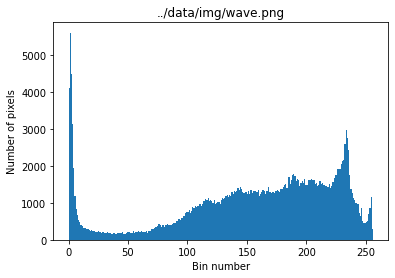

In [17]:
img_dir = os.path.join('..', 'data', 'img')

for filepath in Path(img_dir).glob("*.png"):
    img = cv2.imread(str(filepath))
    
    plot_grayscale(img, filepath)


# Session 3

In [61]:
vinci = cv2.imread(os.path.join('..', 'data', 'img', 'davinci', 'Leonardo_da_Vinci_1.jpg'))

## Colour histograms
`cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumulate]])`

image: source image of uint8 or float32
channels: index of channel for which we calc histogram
    for grayscale its value is [0]
    color image is BGA for 123
mask: masking img, can give None
histSize: our bin count, full scale is 256
ranges: normally [0,256]

## Only blue

In [62]:
hist_blue = cv2.calcHist([image], [0], None, [256], [0,256])
hist_green = cv2.calcHist([image], [1], None, [256], [0,256])
hist_red = cv2.calcHist([image], [2], None, [256], [0,256])

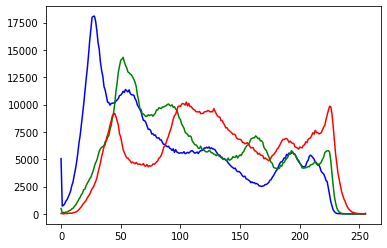

In [63]:
plt.plot(hist_blue, color="Blue")
plt.plot(hist_green, color="Green")
plt.plot(hist_red, color="Red")

## Split channels

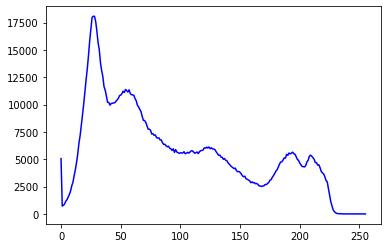

In [64]:
B, G, R = cv2.split(image)
hist = cv2.calcHist([B], [0], None, [256], [0,256])
plt.plot(hist, color='Blue')

## Plot multiple channels at the same time

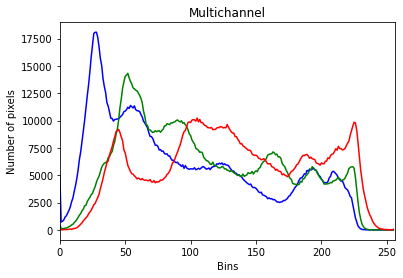

In [65]:
def color_histogram(image):
    channels = cv2.split(image)
    color_names = ("b", "g", "r")
    
    # create figure
    plt.figure()
    plt.title("Multichannel")
    plt.xlabel("Bins")
    plt.ylabel("Number of pixels")
    plt.xlim([0, 256])
    
    # loop over our channels
    for channel, color_name in zip(channels, color_names):
        # create histograms
        hist = cv2.calcHist([channel], [0], None, [256], [0,256])
        # plot it
        plt.plot(hist, color=color_name)
        
    plt.show()

color_histogram(vinci)

## Comparing histograms

In [66]:
vinci2 = cv2.imread(os.path.join('..', 'data', 'img', 'davinci', 'Leonardo_da_Vinci_10.jpg'))

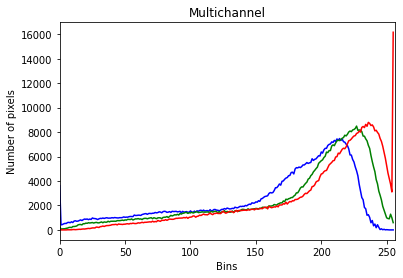

In [67]:
color_histogram(vinci2)

__extract histograms__

In [69]:
# image: vinci
# all 3 colour channels
# No mask
# 8x8x8 bins / resolution of histogram
# 0,256 on all channels
hist1 = cv2.calcHist([vinci], [0,1,2], None, [8,8,8], [0, 256, 0, 256, 0, 256])
hist2 = cv2.calcHist([vinci2], [0,1,2], None, [8,8,8], [0, 256, 0, 256, 0, 256])

MinMax normalization - does not take different amounts of pixels into account

In [73]:
# 0 to INCLUSIVE 255, we define min and max, not a range
hist1 = cv2.normalize(hist1, hist1, 0, 255, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0, 255, cv2.NORM_MINMAX)

# higher number = bigger difference
cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

7016.2373230826015